# Juan Camilo Ávila Bermúdez

In [1]:
import pandas as pd
import numpy as np

import re ## Exprexiones regulares
import nltk ## Procesamiento de lenguaje natural
from nltk.corpus import stopwords ## Palabras vacias
from nltk.stem import SnowballStemmer ## Stemming
from nltk.tokenize import word_tokenize ## Tokenizacion
from nltk.tokenize import RegexpTokenizer ## Tokenizacion
from sklearn.feature_extraction.text import CountVectorizer ## Vectorizador
import spacy ## Procesamiento de lenguaje natural

############## Descarga de recursos de nltk ################
nltk.download('punkt') ## Tokenizador
nltk.download('stopwords') ## Palabras vacias
nltk.download('snowball_data') ## Stemming
nltk.download('wordnet') ## Lematizacion

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
!python -m spacy download es_core_news_sm

  Using cached es_core_news_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


DEPRECATION: https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-2.3.1/es_core_news_sm-2.3.1.tar.gz#egg=es_core_news_sm==2.3.1 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behaviour change. A possible replacement is to use the req @ url syntax, and remove the egg fragment. Discussion can be found at https://github.com/pypa/pip/issues/11617


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')
df

C:\Users\Catnip\AppData\Local\Temp\ipykernel_32472\4081562006.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('https://raw.githubusercontent.com/Izainea/nlp_ean/refs/heads/main/Datos/Datos%20Crudos/reviews_booking.csv')


,Unnamed: 0,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10,Fue la Mejor Opción que pudimos haber tomado e...,NaN,Sí
1,1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10,"Ubicación, comodidades y limpieza",NaN,Sí
2,2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10,"El lugar esta muy bien ubicado, el apartamento...",NaN,Sí
3,3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10,Todo estuvo perfecto. La ubicación y la relaci...,NaN,Sí
4,4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10,"Es muy cómodo y acogedor, la atención es excel...",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...,...
438208,438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,"9,0",NaN,NaN,No
438209,438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10,NaN,NaN,No
438210,438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,"1,0",No me pareció nada,No obstante que dos días antes de mi llegada a...,Sí
438211,438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10,NaN,NaN,No


In [4]:
import nltk
nltk.download('punkt_tab')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Catnip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [5]:
print(df.dtypes)

Unnamed: 0          int64
País               object
Acomodación        object
Noches             object
Fecha hospedaje    object
Grupo viaje        object
Fecha reseña       object
Titulo             object
Calificación       object
Cosas Positivas    object
Cosas Negativas    object
reseña             object
dtype: object


In [6]:
df['Calificación']= df['Calificación'].str.replace(',','.').astype(float)

In [7]:
df.columns

Index(['Unnamed: 0', 'País', 'Acomodación', 'Noches', 'Fecha hospedaje',
       'Grupo viaje', 'Fecha reseña', 'Titulo', 'Calificación',
       'Cosas Positivas', 'Cosas Negativas', 'reseña'],
      dtype='object')

In [ ]:
positivos = df[
    (df['Cosas Positivas'].notna()) & 
    (df['Calificación'] >= 9.0) & 
    (df['Cosas Positivas'].str.len() > 60)&
    (df['País'].isin(['Colombia']))
]['Cosas Positivas']

negativos = df[
    (df['Cosas Negativas'].notna()) & 
    (df['Calificación'] <= 7.0) & 
    (df['Cosas Negativas'].str.len() > 60)&
    (df['País'].isin(['Colombia']))
]['Cosas Negativas']

corpus1 = (positivos.sample(7500)).to_frame(name='Texto')
corpus1['Etiqueta'] = 'Positivo'
corpus2 = (negativos.sample(7500)).to_frame(name='Texto')
corpus2['Etiqueta'] = 'Negativo'

In [9]:
# Preprocesamiento
nlp=spacy.load("es_core_news_sm")

def clean_text(text):
  # Normalización
  text = text.lower()

  # Regex clean
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

  # Tokenización
  tokens = word_tokenize(text)

  # Stop words
  stopwords_esp = stopwords.words('spanish')
  tokens = [token for token in tokens if token not in stopwords_esp]

  # Lemmatize
  doc = nlp(' '.join(tokens))
  tokens = [token.lemma_ for token in doc]

  return ' '.join(tokens)

corpus1['Texto_Limpio'] = corpus1['Texto'].apply(clean_text)
corpus1

,Texto,Etiqueta,Texto_Limpio
342541,"Excelente atención por parte del personal, muy...",Positivo,excelente atencin partir personal limpiar asear
195049,La ubicación es perfecta si requieres trámites...,Positivo,ubicacin perfecto si requerir trmites visar am...
279772,"Ve qué gran hostel, la calidez humana y la bue...",Positivo,ver qu gran hostel calidez humano bueno sazn s...
102865,"Excelente ubicación, súper atención del person...",Positivo,excelente ubicacin sper atencin personal hotel...
410871,"excelentes atención de los encargados, ubicaci...",Positivo,excelente atencin encargar ubicacin ideal emba...
...,...,...,...
310137,"All the place is wonderful and beautiful, it h...",Positivo,all the placer i wonderful and beautiful it lo...
120091,Todo el diseñooo! El personal increíble y que ...,Positivo,diseooo personal increble ligar tan agradeble
213943,Ubicación del hotel muy cercano a sitios de in...,Positivo,ubicacin hotel cercano sitio inters ambientar ...
24769,"Muy buena ubicación, la cama muy cómoda , habi...",Positivo,bueno ubicacin cama cmoda habitacin amplio bue...


In [10]:
corpus2['Texto_Limpio'] = corpus2['Texto'].apply(clean_text)
corpus2

,Texto,Etiqueta,Texto_Limpio
66148,"Había DEMASIADO ruido, en las zonas comunes, e...",Negativo,haba demasiar ruido zona común bao pequeo habi...
187770,Es muy costoso con respecto a otros hoteles y ...,Negativo,costoso respectar hotel desayunar desmejorar
57366,"No me gusto la atención de las personas, el de...",Negativo,gustar atencin personar desayunar tipo bufet m...
194005,"La habitación ubicada cerca de la recepción, y...",Negativo,habitacin ubicar cercar recepcin recibir nuevo...
345451,La puerta principal estaba dañada y no pudimos...,Negativo,puerta principal daada poder ponerle seguro ad...
...,...,...,...
297642,"Creo que ha desmejorado el tema del servicio, ...",Negativo,creer desmejorar temer servicio desayunar bao ...
95867,"La habitación está desgastada, el tiempo de es...",Negativo,habitacin est desgastar tiempo esperar check i...
402880,No hay control de temperatura en las habitacio...,Negativo,control temperatura habitación noche despert v...
373689,La limpieza del baño. Dejaron jabones de los h...,Negativo,limpieza bao dejar jabonar huspedes anterior v...


In [11]:
def extra_cleaning(text):
    # Eliminar saltos de línea
    text = text.replace("\n", " ")

    # Regex para eliminar emojis
    emoji_pattern = re.compile("["
                                u"\U0001F600-\U0001F64F"
                                u"\U0001F300-\U0001F5FF"
                                u"\U0001F680-\U0001F6FF"
                                u"\U0001F1E0-\U0001F1FF"
                                "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Retornar texto limpio
    return text

# Aplicar la limpieza adicional
corpus1['Texto_Limpio'] = corpus1['Texto_Limpio'].apply(extra_cleaning)
corpus2['Texto_Limpio'] = corpus2['Texto_Limpio'].apply(extra_cleaning)

In [12]:
### No funcionó
corpus2

,Texto,Etiqueta,Texto_Limpio
66148,"Había DEMASIADO ruido, en las zonas comunes, e...",Negativo,haba demasiar ruido zona común bao pequeo habi...
187770,Es muy costoso con respecto a otros hoteles y ...,Negativo,costoso respectar hotel desayunar desmejorar
57366,"No me gusto la atención de las personas, el de...",Negativo,gustar atencin personar desayunar tipo bufet m...
194005,"La habitación ubicada cerca de la recepción, y...",Negativo,habitacin ubicar cercar recepcin recibir nuevo...
345451,La puerta principal estaba dañada y no pudimos...,Negativo,puerta principal daada poder ponerle seguro ad...
...,...,...,...
297642,"Creo que ha desmejorado el tema del servicio, ...",Negativo,creer desmejorar temer servicio desayunar bao ...
95867,"La habitación está desgastada, el tiempo de es...",Negativo,habitacin est desgastar tiempo esperar check i...
402880,No hay control de temperatura en las habitacio...,Negativo,control temperatura habitación noche despert v...
373689,La limpieza del baño. Dejaron jabones de los h...,Negativo,limpieza bao dejar jabonar huspedes anterior v...


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Inicializar el vectorizador
vectorizer_positivos = CountVectorizer()
vectorizer_negativos = CountVectorizer()

# Transformar el corpus en una matriz BoW
X_positivos = vectorizer_positivos.fit_transform(corpus1['Texto_Limpio'])
frequencia_positivos = X_positivos.toarray().sum(axis=0)

X_negativos = vectorizer_negativos.fit_transform(corpus2['Texto_Limpio'])
frequencia_negativos = X_negativos.toarray().sum(axis=0)

## Mostrar el vocabulario
#  Crear DataFrames para ambos grupos
vocabulario_positivos = vectorizer_positivos.get_feature_names_out()
vocabulario_negativos = vectorizer_negativos.get_feature_names_out()

df_positivos = pd.DataFrame({'Palabra': vocabulario_positivos, 'Frecuencia': frequencia_positivos}).sort_values(by='Frecuencia', ascending=False)
df_negativos = pd.DataFrame({'Palabra': vocabulario_negativos, 'Frecuencia': frequencia_negativos}).sort_values(by='Frecuencia', ascending=False)

#  Mostrar los resultados
print("Palabras más frecuentes en positivos:\n", df_positivos.head(10))
print("Palabras más frecuentes en negativos:\n", df_negativos.head(10))

Palabras más frecuentes en positivos:
         Palabra  Frecuencia
962       bueno        2663
2505  excelente        2648
4622   personal        2357
6113   ubicacin        2132
1896  desayunar        2002
643     atencin        1818
3179      hotel        1587
401      amable        1418
3007  habitacin        1286
5510   servicio        1123
Palabras más frecuentes en negativos:
          Palabra  Frecuencia
5240   habitacin        3174
5512       hotel        2236
3103         dar        1637
3366   desayunar        1446
5282       hacer        1392
1470         bao        1307
9334       ruido        1249
5216        haba        1141
10336        the        1135
9613    servicio        1086


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializar el vectorizador para positivos y negativos
vectorizer_positivos = TfidfVectorizer(ngram_range=(2,2))
vectorizer_negativos = TfidfVectorizer(ngram_range=(2,2))

# Transformar los textos en matrices TF-IDF
X_positivos = vectorizer_positivos.fit_transform(corpus1['Texto_Limpio'])
X_negativos = vectorizer_negativos.fit_transform(corpus2['Texto_Limpio'])

# Obtener los valores TF-IDF para cada palabra en los respectivos corpus
tfidf_positivos = X_positivos.toarray().sum(axis=0)
tfidf_negativos = X_negativos.toarray().sum(axis=0)

# Obtener el vocabulario correspondiente
vocabulario_positivos = vectorizer_positivos.get_feature_names_out()
vocabulario_negativos = vectorizer_negativos.get_feature_names_out()

# Crear DataFrames para ambos grupos
df_positivos = pd.DataFrame({'Palabra': vocabulario_positivos, 'TF-IDF': tfidf_positivos}).sort_values(by='TF-IDF', ascending=False)
df_negativos = pd.DataFrame({'Palabra': vocabulario_negativos, 'TF-IDF': tfidf_negativos}).sort_values(by='TF-IDF', ascending=False)

# Mostrar las palabras con mayor TF-IDF
print("Palabras con mayor TF-IDF en positivos:\n", df_positivos.head(30))


Palabras con mayor TF-IDF en positivos:
                    Palabra      TF-IDF
29651      personal amable  103.741370
4404      atencin personal   89.080991
17179   excelente ubicacin   71.344811
16858    excelente atencin   60.656027
7034        bueno ubicacin   59.441697
5989           bien ubicar   56.742313
17141   excelente servicio   50.130250
6681         bueno atencin   50.065514
39510   ubicacin excelente   48.585306
13187  desayunar delicioso   48.541208
29671     personal atentar   43.850978
6772       bueno desayunar   40.958179
8637     cercar aeropuerto   39.633443
13340       desayunar rico   37.589481
13144      desayunar bueno   37.542602
39422       ubicacin bueno   37.268939
19857      habitacin cmoda   35.650036
2211   amabilidad personal   34.783978
29761   personal excelente   33.899776
20178    habitación cmodas   32.524105
6991        bueno servicio   30.607925
39545       ubicacin hotel   26.884184
7770            cama cmoda   26.490454
4207         atencin bu

In [15]:
print("Palabras con mayor TF-IDF en negativos:\n", df_negativos.head(30))

Palabras con mayor TF-IDF en negativos:
                   Palabra     TF-IDF
2931       aguar calentar  40.233324
30830      escuchar ruido  26.871833
23793      demasiar ruido  23.744917
84935          todo noche  20.522871
15323            check in  19.881269
38406      habitacin tena  19.643570
3378    aire acondicionar  18.035948
36811          haba aguar  18.031935
38211    habitacin pequea  17.995906
21709       dar habitacin  15.807971
7732     atencin personal  15.330390
64904        poder dormir  15.160402
72988    ruido habitación  14.570063
39649      hacer reservar  14.145531
62928   personal recepcin  14.045218
13568   cambiar habitacin  14.006812
48695        llegar hotel  13.615275
39338         hacer asear  13.487417
50520            mal olor  13.069284
7135      asear habitacin  12.952442
72888        ruido callar  12.910756
24686   desayunar regular  12.441580
30144  entregar habitacin  12.406661
75947    servicio cliente  12.329562
50731        malo atencin  12.1875

# Análisis descriptivo

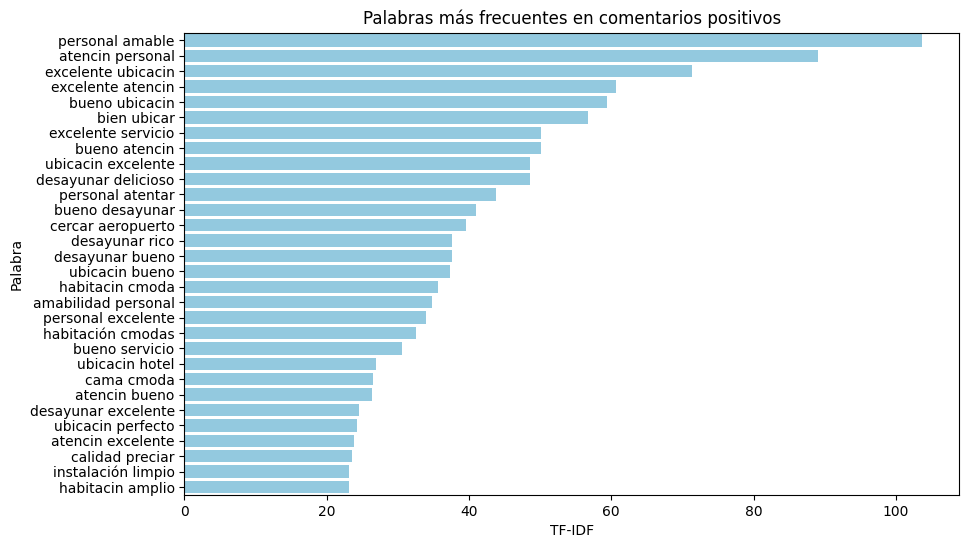

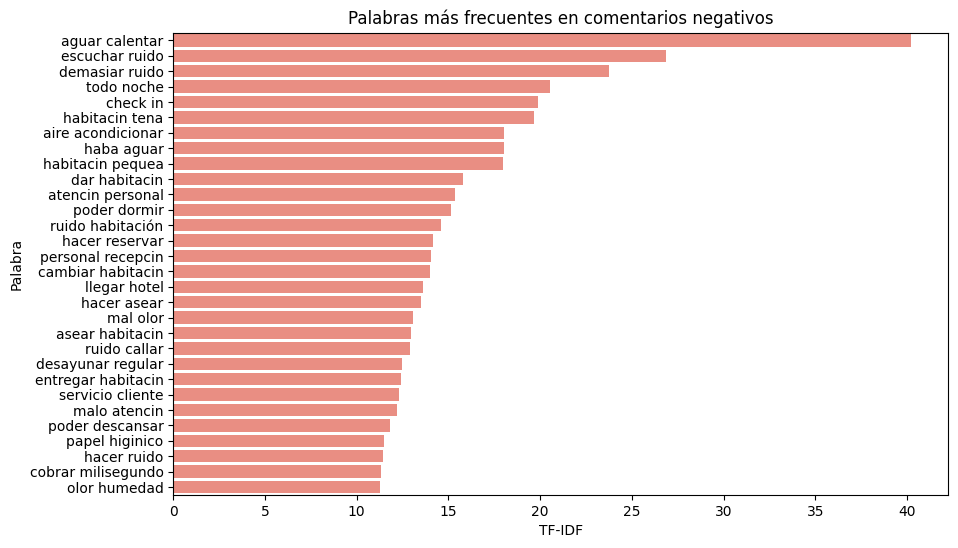

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico para positivos
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF', y='Palabra', data=df_positivos.head(30), color= "skyblue")
plt.title("Palabras más frecuentes en comentarios positivos")
plt.show()

# Gráfico para negativos
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF', y='Palabra', data=df_negativos.head(30), color="salmon")
plt.title("Palabras más frecuentes en comentarios negativos")
plt.show()




Podemos observar en la primera gráfica que las palabras más importantes en los comentarios positivos, están relacionadas con la atención del personal, la ubicación del hotel, la calidad del desayuno y el servicio en general.


En los comentarios negativos las palabras más frecuentes están relacionadas con incomodidad en las noches, el ruido, la dificultad para estar cómodo y descansar, y fallos en los servicios de agua y aire acondicionado.

Ambos tipos de palabras están relacionados principalmente con la comodidad de cualquier tipo.

In [17]:
longitudes_positivas = corpus1['Texto_Limpio'].apply(len).mean()
longitudes_negativas = corpus2['Texto_Limpio'].apply(len).mean()

print("Longitud promedio de textos positivos:", longitudes_positivas)
print("Longitud promedio de textos negativos:", longitudes_negativas)


Longitud promedio de textos positivos: 95.2504
Longitud promedio de textos negativos: 145.32


Aunque los comentarios negativos tienen en promedio una longitud mayor de aproximadamente 142 caracteres, las palabras negativas son menos frecuentes en los comentarios que las palabras positivas, esto tiene sentido porque a la hora de manifestar una queja hay que explicar la razón, en cambio el comentario positivo suele ser una afirmación. 

## Otro punto de vista de las palabras más importantes de los comentarios

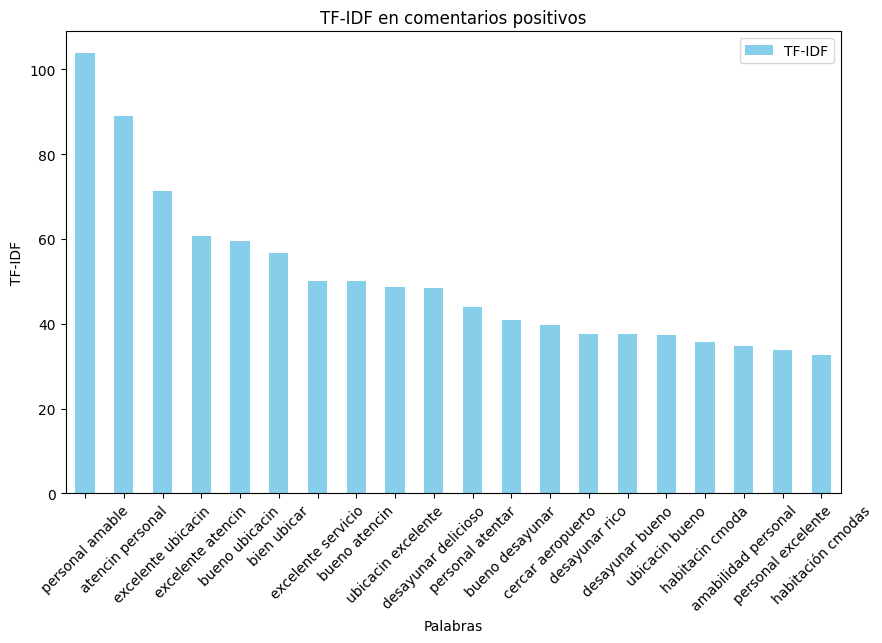

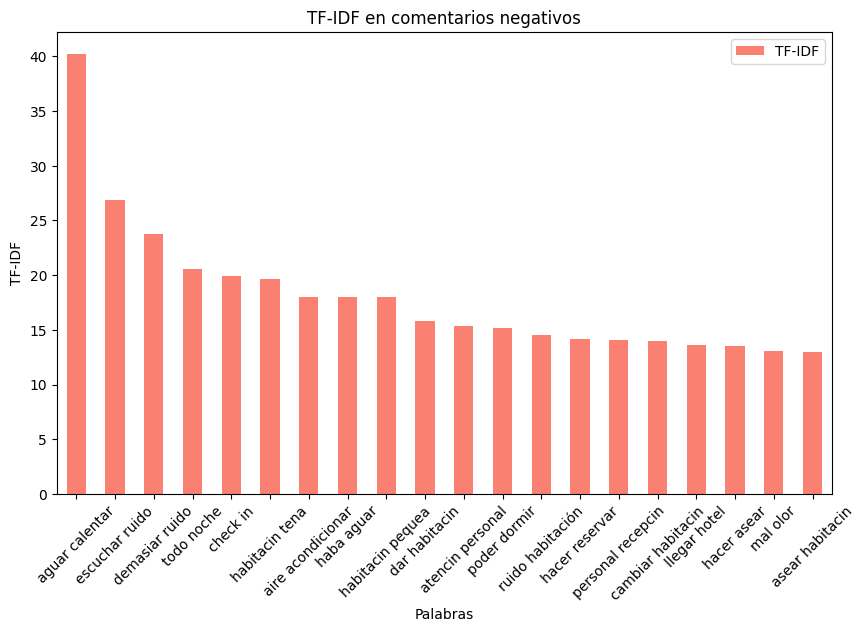

In [18]:
import matplotlib.pyplot as plt

# Gráfico para positivos
plt.figure(figsize=(10, 6))
df_positivos.head(20).plot.bar(
    x='Palabra', 
    y='TF-IDF', 
    title='TF-IDF en comentarios positivos', 
    color='skyblue', 
    ax=plt.gca()
)
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.show()

# Gráfico para negativos
plt.figure(figsize=(10, 6))
df_negativos.head(20).plot.bar(
    x='Palabra', 
    y='TF-IDF', 
    title='TF-IDF en comentarios negativos', 
    color='salmon', 
    ax=plt.gca()
)
plt.xlabel('Palabras')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.show()
